In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from time import sleep
import socket,time,requests
from bs4 import BeautifulSoup
import tkinter as tk
from datetime import date




url="https://uzmanpara.milliyet.com.tr/canli-borsa/bist-TUM-hisseleri/"
r=requests.get(url)
soup=BeautifulSoup(r.content,"html.parser")

bs=BeautifulSoup(r.content, "lxml")
data=soup.find("div",{"class":"box box10 last"})



In [8]:
data=soup.find("tr",{"id":"h_tr_id_MAVI"})


In [9]:
data=soup.find("td",{"id":"h_td_fiyat_id_MAVI"})
text=data.text

In [10]:
text=text.replace(',', '.')
text=float(text)
text

99.4

In [2]:
mavi=pd.read_csv("/Users/Bora/Documents/GitHub/Borsa-Hisse-Analizi/mavi.csv")
mavi.index=pd.to_datetime(mavi["Date"])


In [3]:
del mavi["Date"]

In [4]:
mavi=pd.DataFrame(mavi)

In [5]:
mavi

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-12-31,12.30,12.33,12.37,12.09,865.25K,0.00%
2021-01-04,12.55,12.48,12.61,12.37,2.15M,2.03%
2021-01-05,12.22,12.55,12.66,12.15,1.92M,-2.63%
2021-01-06,12.32,12.32,12.48,12.17,1.61M,0.82%
2021-01-07,12.49,12.39,12.77,12.39,3.00M,1.38%
...,...,...,...,...,...,...
2023-06-12,65.90,65.60,68.75,65.50,4.51M,2.65%
2023-06-13,64.30,65.90,66.10,62.95,3.20M,-2.43%
2023-06-14,62.80,64.30,65.10,61.95,2.24M,-2.33%


In [6]:
close=pd.DataFrame(mavi["Price"])

close


,Price
Date,
2020-12-31,12.30
2021-01-04,12.55
2021-01-05,12.22
2021-01-06,12.32
2021-01-07,12.49
...,...
2023-06-12,65.90
2023-06-13,64.30
2023-06-14,62.80


In [ ]:
dict={'Date':date.today(),'Price':text}
df=pd.DataFrame.from_dict(dict,orient="index")
df=df.T
df.reset_index()
df

In [13]:
df.set_index=df["Date"]
df

,Date,Price
0,2023-06-18,99.4


In [14]:
df.index=df["Date"]

In [15]:
del df["Date"]

In [16]:
df.index=pd.to_datetime(df.index)
df

,Price
Date,
2023-06-18,99.4


In [15]:
close=pd.concat([close,df])
close

,Price
Date,
2021-01-04,20.08
2021-01-05,20.02
2021-01-06,20.02
2021-01-07,19.98
2021-01-08,20.38
...,...
2023-06-13,99.6
2023-06-14,99.3
2023-06-15,101.0


In [8]:
rolling_app5=close.rolling(window=5).mean()
rolling_app14=close.rolling(window=15).mean()
rolling_app21=close.rolling(window=20).mean()



In [9]:
MAs=pd.concat([close,rolling_app5,rolling_app14,rolling_app21],axis=1)
MAs.columns=["Close","short","mid","long"]


In [10]:
MAs.dropna(axis=0,inplace=True)
MAs

,Close,short,mid,long
Date,,,,
2021-01-28,12.91,12.796,12.946000,12.8035
2021-01-29,12.49,12.676,12.920000,12.8130
2021-02-01,12.89,12.644,12.933333,12.8300
2021-02-02,12.92,12.686,12.943333,12.8650
2021-02-03,13.24,12.890,12.980000,12.9110
...,...,...,...,...
2023-06-12,65.90,62.120,56.496667,56.0025
2023-06-13,64.30,62.980,57.226667,56.6075
2023-06-14,62.80,63.440,58.030000,57.0925


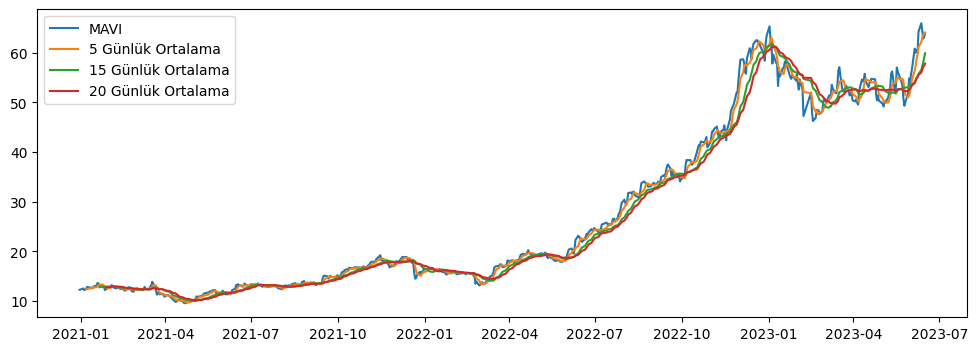

In [11]:
fig,ax=plt.subplots(figsize=(12,4))
ax.plot(close.index,close,label='MAVI')
ax.plot(rolling_app5.index,rolling_app5,label='5 Günlük Ortalama')
ax.plot(rolling_app14.index,rolling_app14,label='15 Günlük Ortalama')
ax.plot(rolling_app21.index,rolling_app21,label='20 Günlük Ortalama')
ax.legend(loc='upper left')


In [12]:
def buy_sell(data,perc=25):
    buy_sell=[]
    buy_signal=[]
    sell_signal=[]
    flag=42

    sm=np.abs(np.percentile(np.array(data["short"]-data["mid"]),perc))
    sl=np.abs(np.percentile(np.array(data["short"]-data["long"]),perc))

    for i in range(0,len(data)):
        if (data["short"][i]>data["mid"][i]+sm) & (data["short"][i]>data["long"][i]+sl):
            buy_signal.append(np.nan)
            if flag !=1:
                sell_signal.append(data["Close"][i])
                buy_sell.append(data["Close"][i])
                flag=1
            else:
                sell_signal.append(np.nan)
        elif (data["short"][i]<data["mid"][i]-sm)&(data["short"][i]<data["long"][i]-sl):
            sell_signal.append(np.nan)
            if flag!=0:
                buy_signal.append(data["Close"][i])
                buy_sell.append(-data["Close"][i])
                flag=0
            else:
                buy_signal.append(np.nan)
        else:
            buy_sell.append(np.nan)
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)

    operations=np.array(buy_sell)
    operations=operations[~np.isnan(operations)]

    neg=0
    pos=0

    for i in range(len(operations)):
        if operations[i]<0:
            neg=i
            break
    for i in range(1,len(operations)):
        if operations[-i]>0:
            pos=i-1
            break
    operations=operations[neg:-pos]
    PL=np.sum(operations)

    return (buy_signal,sell_signal,PL)


In [13]:
m=buy_sell(MAs)
MAs["Al"]=m[0]
MAs["Sat"]=m[1]

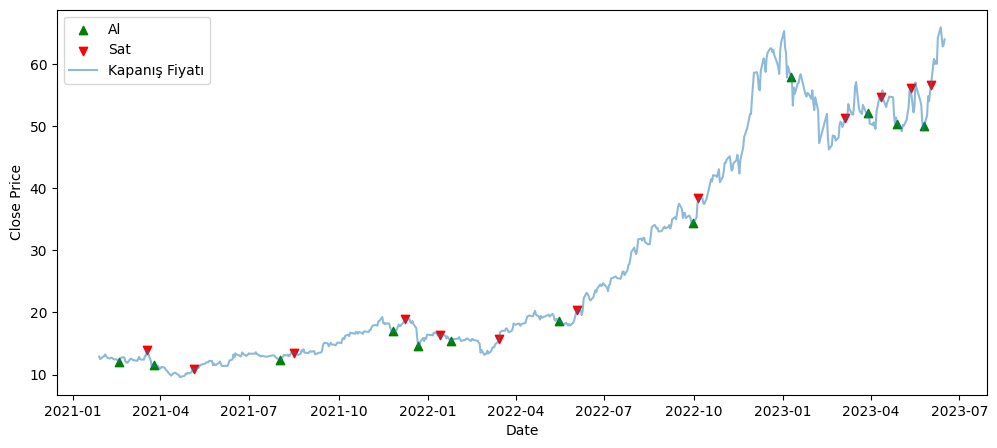

In [14]:
plt.figure(figsize=(12,5))
plt.scatter(MAs.index,MAs["Al"],color="green",label='Al',marker='^',alpha=1)
plt.scatter(MAs.index,MAs["Sat"],color="red",label='Sat',marker='v',alpha=1)
plt.plot(MAs["Close"],label='Kapanış Fiyatı',alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(loc='upper left')
plt.show()

In [15]:
al=MAs["Al"]
al=al.dropna(axis=0)
al

Date
2021-02-17    12.10
2021-03-25    11.60
2021-08-02    12.43
2021-11-26    17.00
2021-12-22    14.53
2022-01-25    15.46
2022-05-16    18.62
2022-09-30    34.47
2023-01-09    57.95
2023-03-29    52.09
2023-04-28    50.36
2023-05-26    50.00
Name: Al, dtype: float64

In [16]:
sat=MAs["Sat"]
sat=sat.dropna(axis=0)
sat


Date
2021-03-18    13.90
2021-05-05    10.91
2021-08-16    13.55
2021-12-08    18.87
2022-01-13    16.35
2022-03-15    15.79
2022-06-03    20.39
2022-10-06    38.43
2023-03-06    51.32
2023-04-12    54.63
2023-05-12    56.20
2023-06-02    56.60
Name: Sat, dtype: float64

In [17]:
sat_val=sat.values
al_val=al.values


In [18]:
sat_val1=sat_val

In [19]:
sat_val1

array([13.9 , 10.91, 13.55, 18.87, 16.35, 15.79, 20.39, 38.43, 51.32,
       54.63, 56.2 , 56.6 ])

In [20]:
al_val1=al_val
al_val1

array([12.1 , 11.6 , 12.43, 17.  , 14.53, 15.46, 18.62, 34.47, 57.95,
       52.09, 50.36, 50.  ])

In [21]:
res=[]

for i in range(len(al_val1)):
    res.append((sat_val1[i]/al_val1[i]))

In [22]:
df=pd.DataFrame()
df["Kar"]=res
df

,Kar
0,1.148760
1,0.940517
2,1.090105
3,1.110000
4,1.125258
5,1.021345
6,1.095059
7,1.114883
8,0.885591
9,1.048762


In [23]:
res0=[100]
for i in range(len(al_val1)):
    res0.append(res0[i]*df["Kar"].loc[i])


In [24]:
df["Eldeki Para"]=res0[1:]
df

,Kar,Eldeki Para
0,1.148760,114.876033
1,0.940517,108.042890
2,1.090105,117.778050
3,1.110000,130.733635
4,1.125258,147.109080
5,1.021345,150.249183
6,1.095059,164.531732
7,1.114883,183.433550
8,0.885591,162.447105
9,1.048762,170.368312


In [25]:
karlilik=df["Eldeki Para"].iloc[-1]/100
karlilik=(karlilik-1)*100
print("Karlılık oranı %",karlilik)

Karlılık oranı % 115.22159293116717


## Her sat tavsiyesinde satmayıp 2.sat tavsiyesinde satarsak ne olur?(Yani 1 adet sat tavsiyesini pas geçersek)

In [111]:
sat_val2=sat_val[1:13:2]

In [112]:
sat_val2

array([13.46, 11.64, 12.73, 13.22, 31.  , 31.76])

In [113]:
al_val2=al_val[0:12:2]
al_val2

array([12.68, 12.  , 12.01, 12.5 , 22.84, 23.88])

In [114]:
res1=[]

for i in range(6):
    res1.append((sat_val2[i]/al_val2[i]))

In [115]:
df1=pd.DataFrame()
df1["Kar"]=res1
df1

,Kar
0,1.061514
1,0.970000
2,1.059950
3,1.057600
4,1.357268
5,1.329983


In [116]:
res2=[100]
for i in range(6):
    res2.append(res2[i]*df1["Kar"].loc[i])




In [117]:
df1["Eldeki Para"]=res2[1:]
df1


,Kar,Eldeki Para
0,1.061514,106.151420
1,0.970000,102.966877
2,1.059950,109.139746
3,1.057600,115.426195
4,1.357268,156.664275
5,1.329983,208.360862


In [118]:
karlilik=df1["Eldeki Para"].iloc[-1]/100
karlilik=(karlilik-1)*100
print("Karlılık oranı %",karlilik)

Karlılık oranı % 108.36086156589579
